# PHAS0030 Assignment Week 5

We will investigate ...

In [7]:
# Appropriate imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### SOR set-up 


In [8]:
def update_GS_SOR(phi, M, N, omega):
    """Update NxN grid of phi using SOR and Gauss-Seidel"""
    # We exclude i=0, i=M, j=0 and j=N as they are boundaries
    for i in range(1,M-1):
        for j in range(1,N-1):
            phi[i,j] = omega*0.25*(phi[i-1,j] + phi[i+1,j] + phi[i,j-1] + phi[i,j+1]) + (1 - omega)*phi[i,j]
    
    return phi

### 2. Set up the array and initial conditions

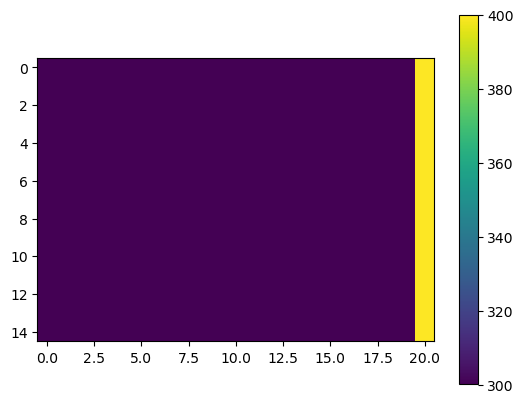

In [9]:
# Let M be the width or y points
M = 15 
#Let N be the length or x points
N = 21
# Initial guess of the temperature distribution
T1 = 300 # 300 K at other boundaries
# initial condition 
T2 = 400 # 400 K at x=21
theta = T1 * np.ones((M,N))
theta[ :,N-1] = T2


# Plot initial guess
plt.imshow(theta)
plt.colorbar()

### 3. Run the solver and plot the result

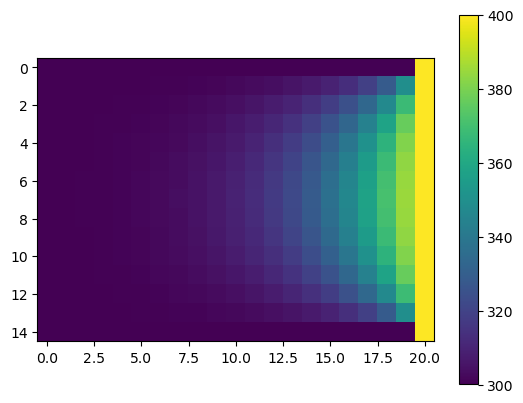

In [10]:

omega=0.7

tol=1e-4
iters=1
delta=1


'''
Huge issue: I cannot use the condition delta >tol
because my np.max(np.abs(thetain-theta)) is zero which 
does not make any sense. I cannot find the reason for why 
my np.max(np.abs(thetain-theta)) is zero!!!!!

But I manage to get around it by limiting the number of 
iteration.
'''

while  iters<100:
    thetain=np.copy(theta)
    theta= update_GS_SOR(thetain,M,N,omega) 
    delta= np.max(np.abs(thetain-theta))
    iters+=1
    
    
'''
Along the boundaries of the metal bar, the temperature does not change
because those points is not included in the update scheme function
'''

plt.imshow(theta)
plt.colorbar()

### Effect of omega
The lower the value of omega results in a smaller range of temperature across the grid and less smooth transition of temperature across the grid. But the effect is not that obvious between 0.3 to 0.9. The critical value of omega is around 0.2 where the temperature does not propagate along the grid from the hotter region (at x=21m) but cluster around from 17.5 to 20 and a huge temperature variation.

### 4. Time evolution function

In [11]:
def update_temperature2D(temper, M, N, zeta):
    """Perform explicit forward FD update for heat equation
    Inputs:
    temper  Array of temperature at present timestep
    n       Temperature timestep to calculate
    zeta    Constant of proportionality
    """
    # How do you initialise temper_next to preserve boundary conditions?
    # We exclude i=0, i=M, j=0 and j=N as they are boundaries
    
    temper_next = np.zeros(np.shape(temper))
    for i in range(1,M-1 ): # Don't update end-points
        for j in range(1,N-1 ):
            temper_next[i,j] = temper[i,j] + zeta*(temper[i+1,j]+temper[i-1,j]+temper[i,j+1]+temper[i,j-1]-4*temper[i,j])
    return temper_next

### 5. Set up initial conditions

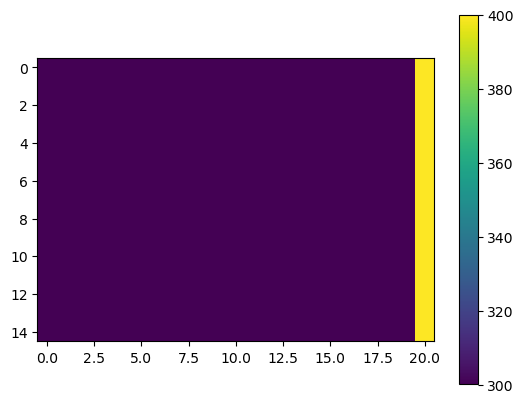

In [12]:
# Let M be the width or y points
M_2 = 15
#Let N be the length or x points
N_2 = 21
# Initial guess of the temperature distribution
T1_2 = 300 # 300 K at other boundaries
# initial condition 
T2_2 = 400 # 400 K at x=21
theta_2 = T1_2 * np.ones((M_2,N_2))
theta_2[:,N_2-1]=400


# Plot initial guess
plt.imshow(theta_2)
plt.colorbar()


## 6. Propagate the solution and store selected points

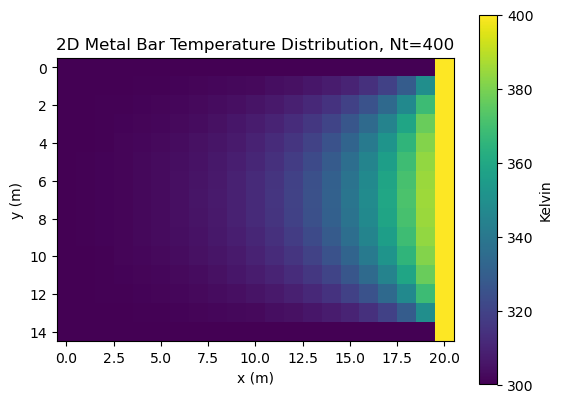

In [13]:
# Looping across a total time interval of 400 
Nt = 400
zeta = 0.1

for i in range(Nt):
    '''The updating scheme excluded the boudaries of the 2D metal bar,
    we have to renew the temperature value of the boundaries for every single loop'''
    theta_2[:,0]=300
    theta_2[0]=300*np.ones(N_2)
    theta_2[M_2-1]=300*np.ones(N_2)
    theta_2[:,N_2-1]=400
    
    
    # Applying the 2D updating temperature distribution propagation scheme
    theta_next = update_temperature2D(theta_2, M_2,N_2,zeta )
    theta_2=theta_next
    
    
theta_2[:,0]=300
theta_2[0]=300*np.ones(N_2)
theta_2[M_2-1]=300*np.ones(N_2)
theta_2[:,N_2-1]=400

#plotting the temperature distribution of the 2D metal bar after Nt time
plt.imshow(theta_2)
plt.title('2D Metal Bar Temperature Distribution, Nt=400')
plt.xlabel('x (m)')
plt.ylabel('y (m)')

plt.colorbar(label='Kelvin')


### Plot the final and steady-state solutions
No apparent difference between the two method. Maybe it is because I have limited the number of loop instead of using the delta > tolerance condition for the while loop. 

### Experimenting with other boudaries

1. Both end (x-axis wise) of the metal bar maintain at 400 K

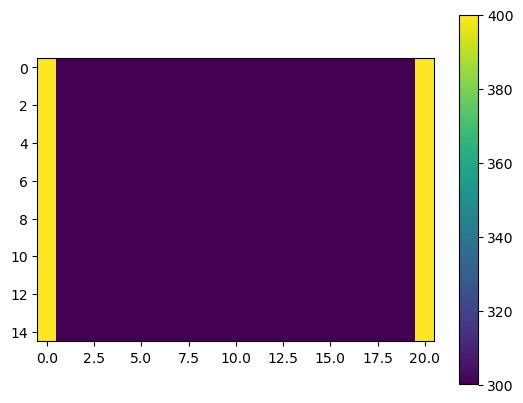

In [8]:
# Let M be the width or y points
M_2 = 15 
#Let N be the length or x points
N_2 = 21
# Initial guess of the temperature distribution
T1_2 = 300 # 300 K at other boundaries
# initial condition 
T2_2 = 400 # 400 K at x=21
theta_2 = T1_2 * np.ones((M_2,N_2))
theta_2[:,N_2-1]=400
theta_2[:,0]=400


# Plot initial guess
plt.imshow(theta_2)
plt.colorbar()

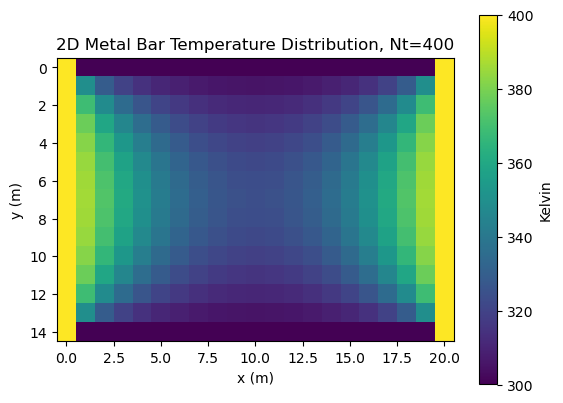

In [9]:
# Looping across a total time interval of 400 
Nt = 400
zeta = 0.1

for i in range(Nt):
    '''The updating scheme excluded the boudaries of the 2D metal bar,
    we have to renew the temperature value of the boundaries for every single loop'''
    
    theta_2[0]=300*np.ones(N_2)
    theta_2[M_2-1]=300*np.ones(N_2)
    theta_2[:,N_2-1]=400
    theta_2[:,0]=400
    
    
    # Applying the 2D updating temperature distribution propagation scheme
    theta_next = update_temperature2D(theta_2, M_2,N_2,zeta )
    theta_2=theta_next
    
    

theta_2[0]=300*np.ones(N_2)
theta_2[M_2-1]=300*np.ones(N_2)
theta_2[:,N_2-1]=400
theta_2[:,0]=400


#plotting the temperature distribution of the 2D metal bar after Nt time
plt.imshow(theta_2)
plt.title('2D Metal Bar Temperature Distribution, Nt=400')
plt.xlabel('x (m)')
plt.ylabel('y (m)')

plt.colorbar(label='Kelvin')


### Experimenting with other Boundaries

2. End of the metal bar (x=21m) oscillate in temperature with respect to time